In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

/Users/Pragati/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/Pragati/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/Users/Pragati/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [5]:
from sklearn.model_selection import train_test_split
X = df.drop(['target','flower_name'], axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
y = df.target

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [8]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [9]:
model.score(X_test, Y_test)

1.0

In [10]:
# for 20 trees
model1 = RandomForestClassifier(n_estimators=20)
model1.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=20)

In [11]:
model1.score(X_test, Y_test)

1.0

In [12]:
model.predict([[5,3,1.7, 0.4]])

/Users/Pragati/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [13]:
y_predicted = model.predict(X_test)
y_predicted

array([2, 2, 0, 2, 1, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2,
       1, 2, 1, 2, 0, 0, 1, 2])

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_predicted)
cm


array([[ 5,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 12]])

Text(69.0, 0.5, 'Truth')

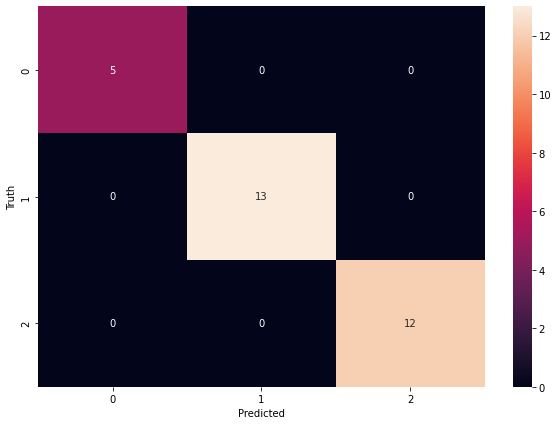

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')